In [3]:
TITANIC = 'data/titanic.csv'

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Alon Nir - Network analysis in Python

# Ian Ozsvald - On diagramatic diagnosis of data

In [3]:
import pandas as pd
df = pd.read_csv(TITANIC, encoding='UTF-8')

### Google facets

https://pair-code.github.io/facets/

### Pandas

##### Discretising

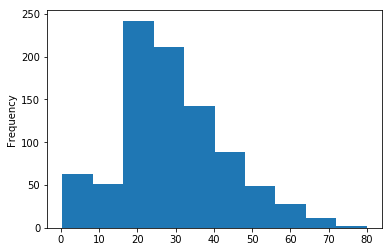

In [4]:
df['Age'].plot.hist()

In [19]:
df['age-disc'] = pd.cut(df['Age'], [0, 20, 40, 60, 80], labels=['child', 'young', 'adult', 'senior'])
df['age-disc'].value_counts()

young     487
child     222
adult     152
senior     26
Name: age-disc, dtype: int64

### Pandas profiling

In [23]:
import pandas_profiling

pandas_profiling.ProfileReport(df)

Number of variables,9
Number of observations,887
Total Missing (%),0.0%
Total size in memory,56.6 KiB
Average record size in memory,65.3 B
Numeric,5
Categorical,2
Boolean,1
Date,0
Text (Unique),1
Rejected,0


### Seaborn

In [9]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [7]:
import seaborn as sns

##### catplot

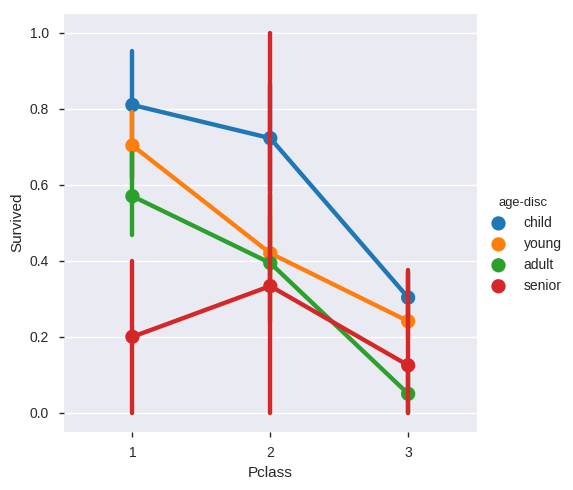

In [21]:
sns.catplot('Pclass', 'Survived', data=df, kind='point', hue='age-disc')

In [26]:
import sklearn.datasets as datasets

In [31]:
data = datasets.load_boston()
df_boston = pd.DataFrame(data.data, columns=data.feature_names)
df_boston['target'] = data.target

In [33]:
df_boston.

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

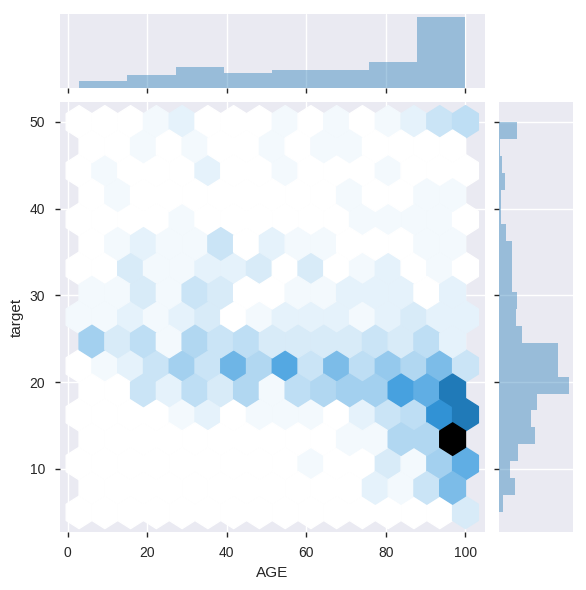

In [38]:
sns.jointplot('AGE', 'target', data=df_boston, kind='hex')

### Discover feature relationships

https://github.com/ianozsvald/discover_feature_relationships

In [60]:
import discover_feature_relationships.discover as disc
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('data/titanic-kaggle/train.csv')

In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


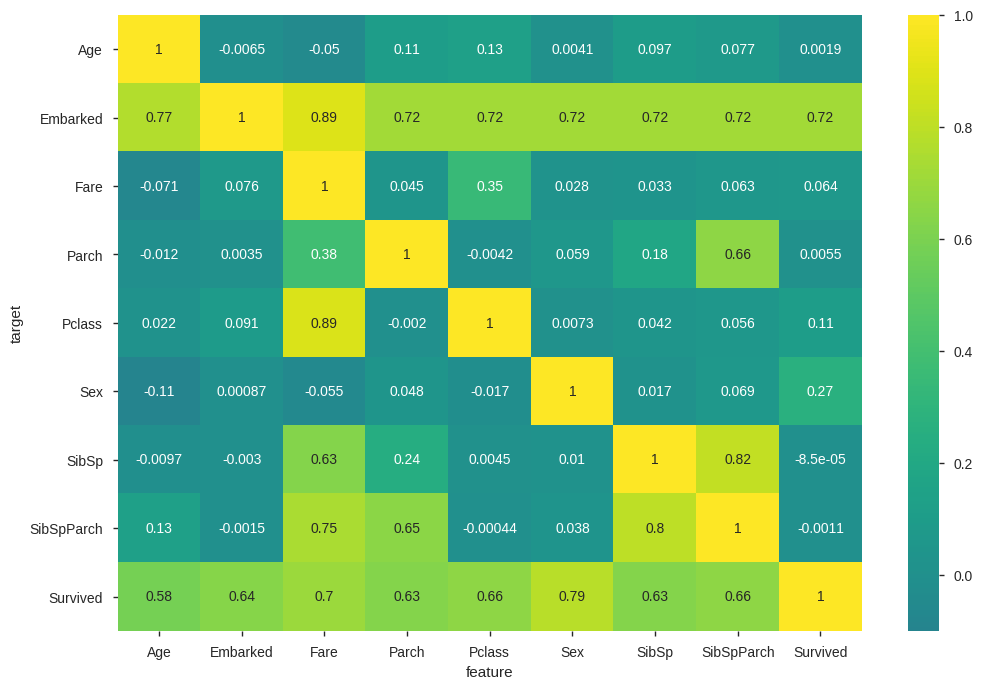

In [62]:
df['SibSpParch'] = df.SibSp + df.Parch

cols = ['Pclass', 'SibSp', 'Parch', 'SibSpParch', 'Age', 'Fare', 'Sex', 'Embarked', 'Survived']
classifier_overrides = set(['Embarked', 'Survived', 'Sex'])

df_results = disc.discover(df[cols].sample(frac=1), classifier_overrides)

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_results.pivot(index='target', columns='feature', values='score').fillna(1),
            annot=True, center=0, ax=ax, vmin=-0.1, vmax=1, cmap="viridis");


# Mark Smith - How to publish a package on PyPi

Tox 
- aims to automate and standardize testing in Python
- https://tox.readthedocs.io/en/latest/

Twine
- a utility used to publish packages to PyPi 
- https://pypi.org/project/twine/

setup.py
- a python file that tell you the module/package has been packaged with Distutils

Distutils
- 

left-pad problem
- lib with 11 lines of code. Removed from NPM and causing massive problems

### Make a package

- have a `src` dir where we put .py files
- `setup.py`at top level

inside setup.py:

In [65]:
from setuptools import setup

setup(
    name='helloworld',
    version='0.0.1',
    description='Say hello',
    #...
)

SystemExit: usage: ipykernel_launcher.py [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
   or: ipykernel_launcher.py --help [cmd1 cmd2 ...]
   or: ipykernel_launcher.py --help-commands
   or: ipykernel_launcher.py cmd --help

error: option -f not recognized

/home/ons21553/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


`python setup.py bdist_wheels`

wheel is basically a zip file

install (the cur dir) python package as editable dependency

`pip install -e .`

### Perfecting it

- doc, testing and housekeeping

To add:
- gitignore.io - find a suitable prefilled gitignore
- choosealicense.com - find a suitable license
- additional metadata (classifiers) setup py

Documentation
- format: ReStructured text (Python specific, can use Sphinx) or Markdown (simpler, can use MkDocs)
- README.md (What the package is, Installation, Usage, )
    - should be added to the setup.py as `long_description`

Testing
- e.g. test pytest - but that is a 3rd party lib!
    - need a Pipfile

`pipenv install -e .`

`pipenv install --dev 'pytest>=3.7`

`pipenv shell`

Also `Pipfile.lock` file created - commited should be both

setup.py - for production dependencies, versions relaxed as much as possible

Pipfile - is for dev reqs (Pytest, mock...), versions relaxed as much as possible, but locked in lock file

##### source distr

should create source distribution
- `sdist`

##### Manifest file

##### publish it

- install twine

`twine upload dist/*`

##### productionize it

- `travis.yml` - for testing on different platforms

cookiecutter - pip install it

`cookiecutter gh:ionelmc/cookieutter-pylibrary`

slides on 

https://github.com/judy2k/publishing_python_packages_talk

# Dough Sillars - Fast and beautiful - modern image delivery technique

- slides on slideshare 

wait on web load is more stressful than walking on cliffs

- 3s delay causes 57% abandon rate of mobile sites
- 4% mobile user throw their phones

Images form half of the website load

**WebPageTest** - good tool to test web page loads
- lighthouse tool inside
- http archive stores lots of lighthouse results for 1.2 mil sites

Focus on image:
- quality
- 

### Image quality

- 85% quality is recommended - a bit tricky recommmendation
- cloudinary - tool where changing url changes the quality
- 33% of sites score lowest quantile

- shaving off just 15% of image quality can save 50% of space

- Butteraugli, SSIM - automatically find the image quality where humans still don't see the diff.

### Image formats

- some `SVGs` contain Adobe Illustrator metadata that take 99% of space
- `webp` - half the size of JPEG usually
    - not always supported but can have JPEG backup
    - deved by Google, supported by Chrome, but also in dev for Edge and Safari
- 2/3 of internet use just JPEGs

### Image sizing

- super large images cannot show on mobile devices anyway - processor heats up to throw away millions of pixels!
- responsive images - set of images 25KB different in size
- responsivebreakpoints.com 
- over 20% of sites not being responsive

### Lazy loading

- 57% don't scroll beyond initial viewport

### Gifs

- very old format, no compression, need to choose 256 colors -> 93% reduction in size

# Alex Willmer - Rehabilitating pickle

In [69]:
import pickle 

In [74]:
pickle.dumps?

In [76]:
original = (1.0, 'text', [2, ], {3: None})
s = pickle.dumps(original, protocol=0)  # The higher the protocol used, the more recent the version of Python needed to read the pickle produced
print(s)
pickle.loads(s)

b'(F1.0\nVtext\np0\n(lp1\nL2L\na(dp2\nL3L\nNstp3\n.'


(1.0, 'text', [2], {3: None})

- works with almost any data (not like JSON)
- compacts the data a bit

- pickle module is not secure against maliciously or erronously constructed code. Essentially running `eval` on the data

common example of using pickle that can end up bad and wipe the whole disk

- defense is in subclassing the Unpickler class and restricting python callables that are loaded

Other attacks
- denial services
- data exposure
- weird machines

Billion laughs/pickle bomb

- few hundred bytes can lock up the machine for minutes - loading is OK, but e.g. printing maxs out the machine
- problem is in self-referencing

https://en.wikipedia.org/wiki/Billion_laughs_attack

In [81]:
x = 1
a = [x, x, x, x, x, x, x, x]
b = [a, a, a, a, a, a, a, a]
c = [b, b, b, b, b, b, b, b]

In [82]:
pickle.dumps(c)

b'\x80\x03]q\x00(]q\x01(]q\x02(K\x01K\x01K\x01K\x01K\x01K\x01K\x01K\x01eh\x02h\x02h\x02h\x02h\x02h\x02h\x02eh\x01h\x01h\x01h\x01h\x01h\x01h\x01e.'

In [83]:
l = pickle.loads(_)

In [84]:
len(l)

8

In [85]:
l

[[[1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1]],
 [[1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1]],
 [[1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1]],
 [[1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1]],
 [[1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1

Slides at: [here](github.com/moreati/pickle-fuzz)

# Alex Chan - Plumber Git

[link to webpage](https://alexwlchan.net/a-plumbers-guide-to-git/)

what's in .git:
* config - of the rep
* info - e.g. info/exclude is copy of gitignore

.git - contains everything known about the git repo

### Exercise - create a file, save it and retrieve it content through plumbing in Git

* create `animals.txt`

* `git hash-object -w animals.txt` - write the file to Git and get hash based on the content of the file (not file name)
- another file with the same content will get the same hash!

* `ls .git/objects/` - a new directory will be created - first two letters of the dir name

* `find .git/objects/ -type f` - the rest of the hash will be the file name of the object created in Git for the file

* `git cat-file -p 9dbfeeee58391ca9f5112bb87d9c2a62f5f7cba5` - pretty print (-p) the content of the file

`ons21553@ons21553 ~/w/p/gitworkshop> find .git/objects/ -type f
.git/objects/9d/bfeeee58391ca9f5112bb87d9c2a62f5f7cba5
ons21553@ons21553 ~/w/p/gitworkshop> git hash-object -w text2 
950109eda80c5f535874cd7a51cd98f0a3777db6
ons21553@ons21553 ~/w/p/gitworkshop> find .git/objects/ -type f
.git/objects/95/0109eda80c5f535874cd7a51cd98f0a3777db6
.git/objects/9d/bfeeee58391ca9f5112bb87d9c2a62f5f7cba5
ons21553@ons21553 ~/w/p/gitworkshop> `

The point is the objects are immutable - if we modify the file, the object stays the same, and new one is created

### Part 2 - adding directories with more files

`git update-index --add animals.txt`

- creates a new file called `index` in `.git`

- `git ls-files` - lists files that are in current index
- if I removed index file, the whole thing would be removed
- `git write-tree` - write the current index to new tree - writes a "tree object" - returns hash

`ons21553@ons21553 ~/w/p/gitworkshop> git cat-file -p  6ca9925b528ac8ca171c807f61b388a4de814141
100644 blob 9dbfeeee58391ca9f5112bb87d9c2a62f5f7cba5	animals.txt`
 - says "there's a file with the content given by the hash, called animals.txt, with these permissions"

Let's create a directory and add more files

    ons21553@ons21553 ~/w/p/gitworkshop> echo "dolphins in Danube" > underwater/d.txt
    ons21553@ons21553 ~/w/p/gitworkshop> echo "sharks in Danube" > underwater/e.txt
    ons21553@ons21553 ~/w/p/gitworkshop> git hash-object -w underwater/d.txt 
    d6eb91262ab4dcf895ccc286492fb2b7692878ad
    ons21553@ons21553 ~/w/p/gitworkshop> git hash-object -w underwater/e.txt 
    58d9be8ff4a4b3b771203403aeb1b32b0d483a9d
    ons21553@ons21553 ~/w/p/gitworkshop> git update-index --add underwater/*

    ons21553@ons21553 ~/w/p/gitworkshop> git write-tree
    bb76675fba0f107b96753212cc011a2b65debf65
    ons21553@ons21553 ~/w/p/gitworkshop> git cat-file -p bb76675fba0f107b96753212cc011a2b65debf65
    100644 blob 9dbfeeee58391ca9f5112bb87d9c2a62f5f7cba5	animals.txt
    040000 tree 384fa7b5c35bfe4fb01fd2bb9370d56209a6cdf1	underwater
    ons21553@ons21553 ~/w/p/gitworkshop> git cat-file -p 384fa7b5c35bfe4fb01fd2bb9370d56209a6cdf1
    100644 blob d6eb91262ab4dcf895ccc286492fb2b7692878ad	d.txt
    100644 blob 58d9be8ff4a4b3b771203403aeb1b32b0d483a9d	e.txt
    ons21553@ons21553 ~/w/p/gitworkshop>

- changing a file inside a subdir, then adding to index + writing tree would result in a new object - the old one is still there.

### Commits

which tree is my current root directory? Commit!

    ons21553@ons21553 ~/w/p/gitworkshop> echo "initial commit" | git commit-tree 384fa7b5c35bfe4fb01fd2bb9370d56209a6cdf1
    a5b8ee9a7e65868315cd62f376f505c798772de0

creates a new object of type commit - everything is object in Git

    ons21553@ons21553 ~/w/p/gitworkshop> git cat-file -p a5b8ee9a7e65868315cd62f376f505c798772de0
    tree 384fa7b5c35bfe4fb01fd2bb9370d56209a6cdf1
    author fero <fhajnovic.ons@gmail.com> 1537183104 +0100
    committer fero <fhajnovic.ons@gmail.com> 1537183104 +0100

    initial commit

### Part 3

Add another commit with a parent commit (-p flag in the `commit-tree`)

    ons21553@ons21553 ~/w/p/gitworkshop> echo "manta ray" > creatures.txt
    ons21553@ons21553 ~/w/p/gitworkshop> git update-index --add creatures.txt 
    ons21553@ons21553 ~/w/p/gitworkshop> git write-tree
    3dab7f7f57a629e0d99f61464e55e8c67e6dbf3d
    ons21553@ons21553 ~/w/p/gitworkshop> git cat-file -p 3dab7f7f57a629e0d99f61464e55e8c67e6dbf3d
    100644 blob 9dbfeeee58391ca9f5112bb87d9c2a62f5f7cba5	animals.txt
    100644 blob 4208bde55c480f5a735b05b6061f5637e2752777	creatures.txt
    040000 tree b9cc55fc574def89ca4f17491ee0c6c9b98eb7fa	underwater
    ons21553@ons21553 ~/w/p/gitworkshop> echo "another commit" | git commit-tree 3dab7f7f57a629e0d99f61464e55e8c67e6dbf3d -p a5b8ee9a7e65868315cd62f376f505c798772de0
    11f1293e019be6d19f6e10bf71181e1bbcfea411


    ons21553@ons21553 ~/w/p/gitworkshop> git log 11f1293e019be6d19f6e10bf71181e1bbcfea411
    commit 11f1293e019be6d19f6e10bf71181e1bbcfea411
    Author: fero <fhajnovic.ons@gmail.com>
    Date:   Mon Sep 17 12:28:42 2018 +0100

        another commit

    commit a5b8ee9a7e65868315cd62f376f505c798772de0
    Author: fero <fhajnovic.ons@gmail.com>
    Date:   Mon Sep 17 12:18:24 2018 +0100

        initial commit

Add one more commit to create a linear chain
- git status still does not know which of these are interesting, cause we did not associate them with the master branch (where it is pointing)

    ons21553@ons21553 ~/w/p/gitworkshop> git update-index --add underwater/e.txt 
    ons21553@ons21553 ~/w/p/gitworkshop> git ls-files
    animals.txt
    creatures.txt
    underwater/d.txt
    underwater/e.txt
    ons21553@ons21553 ~/w/p/gitworkshop> git write-tree
    b58aa5fc7d47a781001c2dc0df12675316082f7e
    ons21553@ons21553 ~/w/p/gitworkshop> echo "yet another commit" | git commit-tree b58aa5fc7d47a781001c2dc0df12675316082f7e -p 11f1293e019be6d19f6e10bf71181e1bbcfea411
    dc497e40da7c0f1c5cf57f6d032a3509e60893c3
    ons21553@ons21553 ~/w/p/gitworkshop> git log dc497e40da7c0f1c5cf57f6d032a3509e60893c3
    commit dc497e40da7c0f1c5cf57f6d032a3509e60893c3
    Author: fero <fhajnovic.ons@gmail.com>
    Date:   Mon Sep 17 12:33:12 2018 +0100

        yet another commit

    commit 11f1293e019be6d19f6e10bf71181e1bbcfea411
    Author: fero <fhajnovic.ons@gmail.com>
    Date:   Mon Sep 17 12:28:42 2018 +0100

        another commit

    commit a5b8ee9a7e65868315cd62f376f505c798772de0
    Author: fero <fhajnovic.ons@gmail.com>
    Date:   Mon Sep 17 12:18:24 2018 +0100

        initial commit
    ons21553@ons21553 ~/w/p/gitworkshop> 


A merge commit

    ons21553@ons21553 ~/w/p/gitworkshop> git update-index --add text2 
    ons21553@ons21553 ~/w/p/gitworkshop> git write-tree
    faa8a651823fb4dbee70a091aea18157e540caaf
    ons21553@ons21553 ~/w/p/gitworkshop> echo "merge commit" | git commit-tree faa8a651823fb4dbee70a091aea18157e540caaf -p dc497e40da7c0f1c5cf57f6d032a3509e60893c3 -p 11f1293e019be6d19f6e10bf71181e1bbcfea411
    0ba3251296c2c212591986a8d4264c68d95f9877
    ons21553@ons21553 ~/w/p/gitworkshop> git cat-file -p 0ba3251296c2c212591986a8d4264c68d95f9877
    tree faa8a651823fb4dbee70a091aea18157e540caaf
    parent dc497e40da7c0f1c5cf57f6d032a3509e60893c3
    parent 11f1293e019be6d19f6e10bf71181e1bbcfea411
    author fero <fhajnovic.ons@gmail.com> 1537184181 +0100
    committer fero <fhajnovic.ons@gmail.com> 1537184181 +0100

    merge commit
    ons21553@ons21553 ~/w/p/gitworkshop> git log 0ba3251296c2c212591986a8d4264c68d95f9877
    commit 0ba3251296c2c212591986a8d4264c68d95f9877
    Merge: dc497e4 11f1293
    Author: fero <fhajnovic.ons@gmail.com>
    Date:   Mon Sep 17 12:36:21 2018 +0100

        merge commit

    commit dc497e40da7c0f1c5cf57f6d032a3509e60893c3
    Author: fero <fhajnovic.ons@gmail.com>
    Date:   Mon Sep 17 12:33:12 2018 +0100

        yet another commit

    commit 11f1293e019be6d19f6e10bf71181e1bbcfea411
    Author: fero <fhajnovic.ons@gmail.com>
    Date:   Mon Sep 17 12:28:42 2018 +0100

        another commit

    commit a5b8ee9a7e65868315cd62f376f505c798772de0
    Author: fero <fhajnovic.ons@gmail.com>
    Date:   Mon Sep 17 12:18:24 2018 +0100

        initial commit

We've seen 3 types of objects::
- blob
- tree
- commit

### What about branches?

There's "refs" dir in the .git directory

    ons21553@ons21553 ~/w/p/gitworkshop> git update-ref refs/heads/master 0ba3251296c2c212591986a8d4264c68d95f9877

Doesn't do anything, just updates the refs in .git folder. Status now works, master points to a commit! Git log works too!

    ons21553@ons21553 ~/w/p/gitworkshop> git status
    On branch master
    Untracked files:
      (use "git add <file>..." to include in what will be committed)

        text

    nothing added to commit but untracked files present (use "git add" to track)
    ons21553@ons21553 ~/w/p/gitworkshop> cat .git/refs/heads/master 
    0ba3251296c2c212591986a8d4264c68d95f9877

Can even use it for `git cat-file -p`

    ons21553@ons21553 ~/w/p/gitworkshop> git cat-file -p master
    tree faa8a651823fb4dbee70a091aea18157e540caaf
    parent dc497e40da7c0f1c5cf57f6d032a3509e60893c3
    parent 11f1293e019be6d19f6e10bf71181e1bbcfea411
    author fero <fhajnovic.ons@gmail.com> 1537184181 +0100
    committer fero <fhajnovic.ons@gmail.com> 1537184181 +0100

    merge commit

Could also use `rev-master` to find out the commmit object ID

    ons21553@ons21553 ~/w/p/gitworkshop> git rev-parse master
    0ba3251296c2c212591986a8d4264c68d95f9877

Ref is literally just a reference - contains just object ID

* HEAD points to ref
* ref points to commit
* commit points to other commits (to track history of commits) and tree (to see what's in the commmit)

In practice these commands will not be used much other than
- explaining how internalls of Git work
- for scripting Git programmatically (the commands have more suitable output than "normal" git commands)

# Luna Chen - Reflection and introspection

introspection -> purpose is to examine

reflection -> to modify

### Introspection

In [11]:
class Pet:
    def __init__(self, name):
        self.name = name
        
    def get_name(self):
        print(self.name)
        
class Clownfish(Pet):
    def swim(self):
        print(f"{self.name}, swim")
        
marvin = Clownfish("Marvin")

print(dir(marvin))
print(marvin.__dict__)

print(type(marvin))
print(isinstance(marvin, Clownfish))
print(issubclass(Clownfish, Pet))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'get_name', 'name', 'swim']
{'name': 'Marvin'}
<class '__main__.Clownfish'>
True
True


In [19]:
import inspect
from functools import wraps

def who_called_me(callable_):
    @wraps(callable_)
    def wrapper(*args, **kwargs):
        caller = inspect.stack()[1]  # 0 is stack itself
        
        print(f"{callable_.__name__} is called by {caller.function}")
        
        return callable_(*args, **kwargs)
    
    return wrapper

@who_called_me
def peter():
    print("hello")

@who_called_me
def james():
    peter()
    
james()

james is called by <module>
peter is called by james
hello


#  Python 2 is retiring

- Python conceived in 1980, implementation started 1989
- 1991 - Python 0.9
- 1994 - Python 1
- 2000 - Python 2
- 2010 - Python 2.7
- 2020 - Python 2 dead


- 2008 - Python 3.0

### Migration to python3

- why?
    - no support for python2 after 1.1.2020
    - Pandas, Scikit, Jupyter, Matplotlib, ...
    - Python3 is faster now that Python2
    

- why not?
    - python2 is going to be supported, but not officially
    - tauton - unofficial Python 2.8

Tools:
- 2to3 - uses fixers
- 3to2 - converts python 2 code to backward compatible python 3 code
- futurize
- modernize
- tox - allows running tests on many different Python configurations
- coverage
- pylint

# Ryan Kirkbride - Programming music

- SuperCollider + FoxDot (Python)

Algorave - writing to make music to dance to

supercollider - environment for live coding + audio engine for generating sounds. Has been around for a while

tidalcycles - haskell

sonic-pi - ruby (lots of typing)

fox-dot - python stuff